<a href="https://colab.research.google.com/github/EvelinaYusupova322/BAS_rgr/blob/main/%D0%AE%D1%81%D1%83%D0%BF%D0%BE%D0%B2%D0%B0_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# РГР 5. Динамика.


Юсупова Эвелина Альфредовна, гр. ПИ-322


## Исходные данные

Вариант задания - 3 - GMK Norilskiy Nikel PAO (GMKN)


In [1]:
# подключаем библиотеку для работы с таблицами
import pandas as pd

# Читаем таблицу CSV в переменную SBER
# Копируем путь к файлу и вставляем как аргумент функции READ_CSV
# Далее по тексту используйте биржевой тикер своего актива в названиях и заголовках
nvtk = pd.read_csv("/GMKN Historical Data.csv", parse_dates=['Date'], usecols=range(5), index_col=0)

from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
nvtk['Price'] = lbl.fit_transform(nvtk['Price'].astype(str))
nvtk['Open'] = lbl.fit_transform(nvtk['Open'].astype(str))
nvtk['High'] = lbl.fit_transform(nvtk['High'].astype(str))
nvtk['Low'] = lbl.fit_transform(nvtk['Low'].astype(str))
# Проверяем, правильно ли прочитаны данные
nvtk.head(3)

,Price,Open,High,Low
Date,,,,
2019-01-03,0,0,0,0
2019-01-04,1,1,1,1
2019-01-08,3,2,2,3


In [2]:
# Тип данных по столбцам
nvtk.dtypes

Price    int64
Open     int64
High     int64
Low      int64
dtype: object

In [3]:
# Переименуем столбец Price в Close
nvtk.rename(columns={"Price": "Close"}, inplace=True)

# Проверяем, правильно ли переименовали столбец
nvtk.head(3)

,Close,Open,High,Low
Date,,,,
2019-01-03,0,0,0,0
2019-01-04,1,1,1,1
2019-01-08,3,2,2,3


In [4]:
# Установим библиотеку биржевых гарфиков
!pip install mplfinance

     |████████████████████████████████| 70 kB 2.6 MB/s 


In [5]:
# Подключаем библиотеку для построения биржевых графиков
import mplfinance as mpf

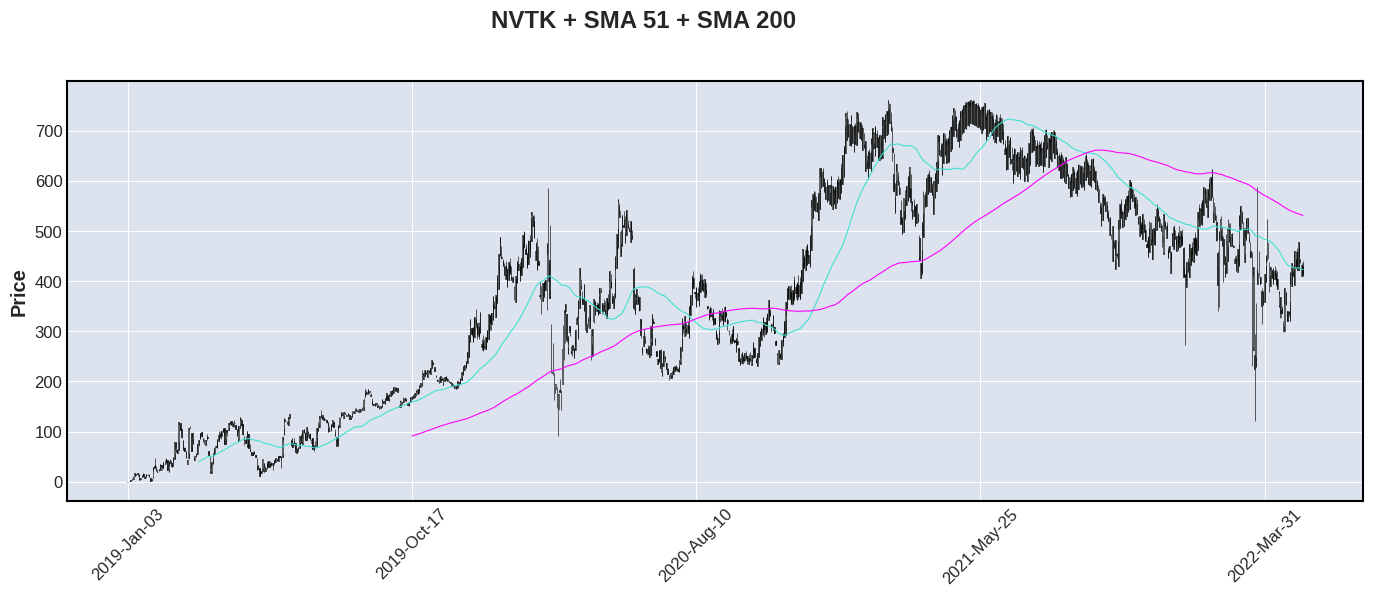

In [6]:
# Построим свечной график
# Наносим скользящие средние с периодами 51 и 200 дней
mpf.plot(nvtk, warn_too_much_data=10000, figsize=(18, 6), mav=(51, 201), 
         title="NVTK + SMA 51 + SMA 200", type='candle')
import matplotlib.pyplot as plt
plt.show()